In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('E:/rahul/processed_data/Central_india.csv',index_col=[0])
data

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89
0,301.0,277.4,299.5,279.2,301.9,285.5,299.8,287.7,303.1,296.7,322.363373,0.098,0.94,0.921595,0.932220,0.945677,0.959640,0.978885
1,301.2,278.7,300.6,281.1,302.9,287.5,300.7,289.4,301.2,294.1,323.428192,0.103,1.10,0.925299,0.935130,0.949158,0.962421,0.976428
2,301.3,279.6,301.1,282.0,303.3,288.3,301.0,290.3,301.2,294.1,323.094177,0.105,1.20,0.927979,0.936566,0.950544,0.964452,0.976428
3,301.5,279.9,301.5,282.7,303.5,288.7,301.2,290.6,300.8,294.5,323.235107,0.107,1.13,0.928358,0.937645,0.951236,0.964807,0.979056
4,301.0,280.1,301.4,282.8,303.6,289.0,301.2,290.7,302.2,295.6,324.284515,0.107,1.17,0.930565,0.938288,0.951910,0.965139,0.978160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12917,303.1,282.2,303.4,285.4,305.2,294.0,303.4,296.3,300.0,298.6,322.693146,0.087,2.74,0.931046,0.940672,0.963303,0.976599,0.995333
12918,302.0,281.6,302.1,284.7,303.6,293.2,301.5,295.1,298.1,296.7,321.220734,0.098,2.97,0.932450,0.942403,0.965744,0.978773,0.995304
12919,299.9,279.2,300.1,282.4,301.6,291.3,299.1,293.0,297.1,295.9,320.268524,0.107,3.13,0.930977,0.941020,0.965849,0.979605,0.995961
12920,303.5,283.3,303.7,286.8,305.3,294.7,303.4,296.8,299.6,297.7,320.424225,0.078,2.73,0.933443,0.944353,0.965280,0.978247,0.993658


In [3]:
data['(36V-18V)^2']=(data['BT_36V']-data['BT_18V'])**2

In [4]:
# correlation matrix
correlation_matrix=data.corr()
correlation_matrix

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89,(36V-18V)^2
BT_6V,1.000000,0.629765,0.924506,0.537309,0.920717,0.639681,0.907612,0.724158,0.751715,0.709143,0.493265,-0.146924,-0.123934,-0.141363,-0.245351,-0.269298,-0.209745,-0.067537,0.487265
BT_6H,0.629765,1.000000,0.556008,0.839027,0.530980,0.800415,0.512280,0.743805,0.468297,0.578562,0.444420,-0.119433,0.025632,0.679843,0.488857,0.429252,0.430252,0.227722,0.306132
BT_10V,0.924506,0.556008,1.000000,0.614010,0.991048,0.725388,0.977140,0.809459,0.814308,0.788710,0.543404,-0.130610,-0.089828,-0.163555,-0.224408,-0.239571,-0.176604,-0.032511,0.524998
BT_10H,0.537309,0.839027,0.614010,1.000000,0.582325,0.958044,0.557674,0.877640,0.510473,0.678198,0.483266,-0.119668,0.093592,0.564978,0.631320,0.580108,0.580210,0.342276,0.365781
BT_18V,0.920717,0.530980,0.991048,0.582325,1.000000,0.705407,0.991466,0.798723,0.835328,0.795253,0.549042,-0.113240,-0.124163,-0.192117,-0.254774,-0.277659,-0.216169,-0.060651,0.496288
BT_18H,0.639681,0.800415,0.725388,0.958044,0.705407,1.000000,0.692849,0.969951,0.576311,0.783355,0.451136,-0.074419,0.239013,0.418486,0.470006,0.485025,0.523594,0.421293,0.352027
BT_36V,0.907612,0.512280,0.977140,0.557674,0.991466,0.692849,1.000000,0.803526,0.855743,0.816145,0.553367,-0.077379,-0.096041,-0.204072,-0.271879,-0.284486,-0.221692,-0.059569,0.381723
BT_36H,0.724158,0.743805,0.809459,0.877640,0.798723,0.969951,0.803526,1.000000,0.671955,0.861716,0.475352,-0.036783,0.250673,0.265554,0.287741,0.328781,0.402290,0.389034,0.290954
BT_89V,0.751715,0.468297,0.814308,0.510473,0.835328,0.576311,0.855743,0.671955,1.000000,0.870376,0.668231,-0.019418,-0.277622,-0.113293,-0.170570,-0.249856,-0.215448,-0.233963,0.230388
BT_89H,0.709143,0.578562,0.788710,0.678198,0.795253,0.783355,0.816145,0.861716,0.870376,1.000000,0.534949,0.004904,0.085312,0.068389,0.061983,0.080515,0.156725,0.275053,0.193029


In [5]:
y0=data['MODIS_LST']
x0=data[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]
# x0=data.drop(['MODIS_LST','SM','VegWater'],axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split(x0, y0, test_size=0.30, random_state=42)

In [6]:
sc_X=StandardScaler()  
sc_Y=StandardScaler()  
X_train_sc=sc_X.fit_transform(X_train)
Y_train=np.array(Y_train).reshape(-1,1)
Y_train_sc=sc_Y.fit_transform(Y_train)

# LinearRegression

In [7]:
reg = LinearRegression().fit(X_train_sc, Y_train_sc)
Y_pred=sc_Y.inverse_transform(reg.predict(sc_X.transform(X_test)))
print("R2-: ",reg.score(sc_X.fit_transform(X_test),sc_Y.fit_transform(np.array(Y_test).reshape(-1,1))))
print("coeff: ", reg.coef_)
print("intercept: ",reg.intercept_)

R2-:  0.560710673147363
coeff:  [[-0.15011632  0.06019305 -0.33010244  1.38258075 -0.74449495 -1.87699495
   1.26315148  0.754129    0.6208452  -0.26104218  0.1620953 ]]
intercept:  [-8.81570088e-15]


In [8]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")
error=Y_test-Y_pred.reshape(-1)

RMSE:  2.994 K


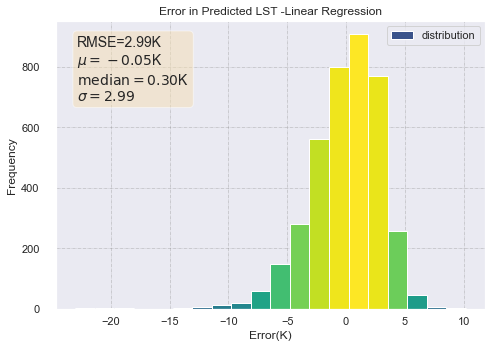

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
  
  
N_points = 10000
n_bins = 20
  
# Creating distribution
legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST -Linear Regression')
plt.show()

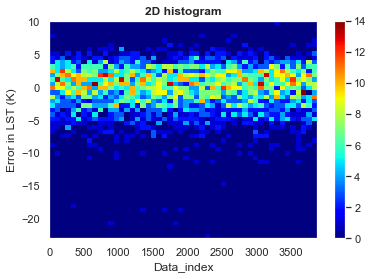

In [10]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram', fontweight ="bold")
plt.show()

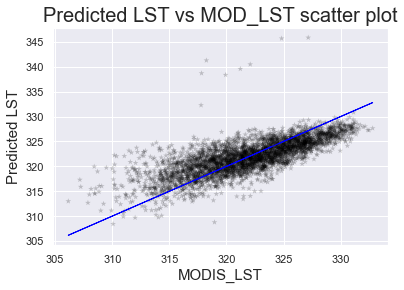

In [11]:
plt.scatter(Y_test,Y_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST vs MOD_LST scatter plot",fontsize=20)
plt.ylabel("Predicted LST",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(Y_test,Y_test,c='blue',lw=1)
plt.show()

# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3, svd_solver='full')
l=pca.fit_transform(x0)
print(pca.explained_variance_ratio_)

[0.74078998 0.14152939 0.05125348]


# Support vector regression

In [14]:
regressor=SVR(C=100, gamma=0.1,kernel='rbf')
regressor.fit(X_train_sc,Y_train_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.1)

In [15]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))

df=pd.DataFrame({})
df['MOD_LST']=Y_test
df['pred_LST']=Y_pred
df['Error']=Y_test-Y_pred
df.describe()

R-Square:  0.6968600520361985


,MOD_LST,pred_LST,Error
count,3877.000000,3877.000000,3877.000000
mean,321.797151,322.010260,-0.213109
std,4.514893,3.797388,2.476662
min,306.146637,306.300458,-11.120986
25%,318.673065,319.506920,-1.571319
50%,321.920898,321.898165,0.025684
75%,325.161438,324.680119,1.421872
max,332.798920,331.899240,9.784823


In [16]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

error=Y_test-Y_pred.reshape(-1)

RMSE:  2.485 K


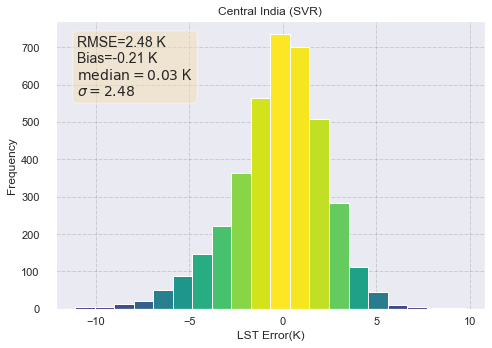

In [17]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('Central India (SVR)')
plt.savefig(r'E:\Central India (SVR).jpeg',dpi=400)
plt.show()


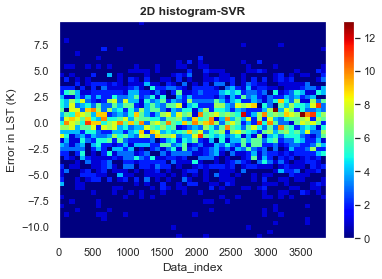

In [18]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

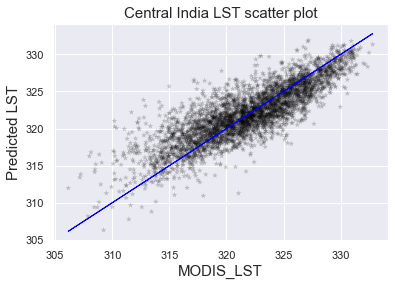

In [19]:
plt.scatter(Y_test,Y_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Central India LST scatter plot",fontsize=15)
plt.ylabel("Predicted LST",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(Y_test,Y_test,c='blue',lw=1)
plt.savefig(r'E:\Central India LST scatter plot.jpeg',dpi=400)
plt.show()


# Testing over north india data using central india algorithm

In [20]:
d=pd.read_csv('E:/rahul/processed_data/North_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  0.08258942112638479


,MOD_LST,pred_LST,Error
count,27484.000000,27484.000000,27484.000000
mean,318.108768,319.640552,-1.531784
std,7.059222,5.294214,6.585630
min,271.113190,298.993667,-46.605702
25%,313.723068,316.885870,-5.224891
50%,318.805344,319.319241,-1.365555
75%,323.001244,322.828892,2.382043
max,339.174805,344.533649,26.022005


RMSE:  6.761 K


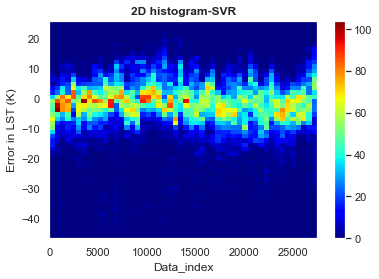

In [21]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

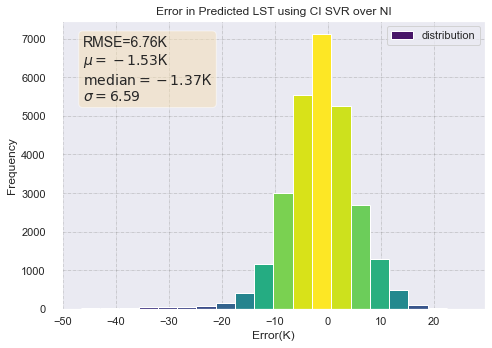

In [22]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using CI SVR over NI')
plt.show()

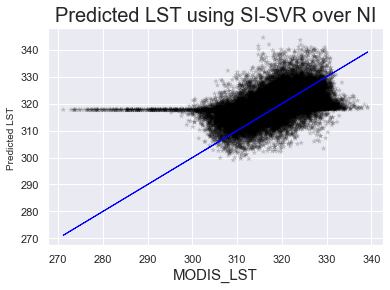

In [23]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over NI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# South india data for testing

In [24]:
d=pd.read_csv('E:/rahul/processed_data/South_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  0.07982325605818064


,MOD_LST,pred_LST,Error
count,13008.000000,13008.000000,13008.000000
mean,319.269055,316.715388,2.553667
std,5.276059,4.243872,4.369560
min,297.974426,301.038782,-19.129754
25%,315.767387,314.099723,0.024344
50%,319.299347,317.022108,2.899784
75%,323.105225,319.206460,5.492046
max,334.068787,333.422467,21.127602


RMSE:  5.061 K


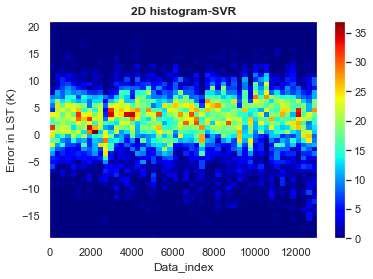

In [25]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

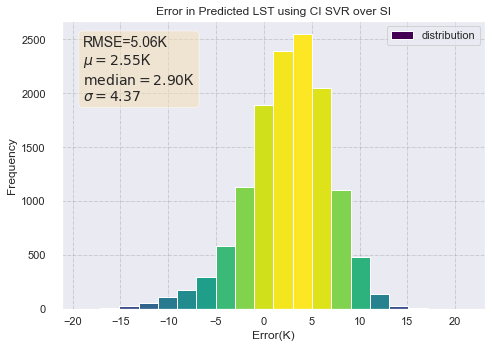

In [26]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using CI SVR over SI')
plt.show()

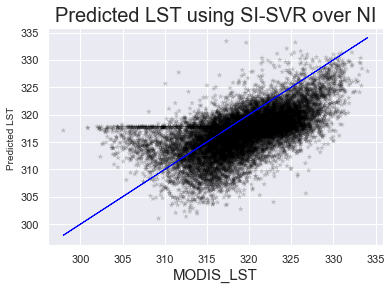

In [27]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over NI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# Testing over Central INDIA but Year 2007

In [28]:
d=pd.read_csv(r'E:\rahul\processed_data\MAY_2007\Central_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  0.27769079348663683


,MOD_LST,pred_LST,Error
count,1213.000000,1213.000000,1213.000000
mean,322.548813,321.653266,0.895547
std,3.628414,2.991534,2.950731
min,313.603638,309.022431,-11.928384
25%,319.937256,319.618347,-1.167395
50%,322.795410,321.511361,0.950484
75%,325.333557,323.581707,2.809501
max,332.288483,332.964159,10.899292


RMSE:  3.082 K


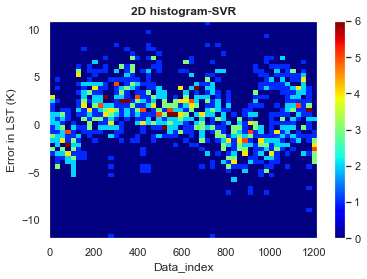

In [29]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

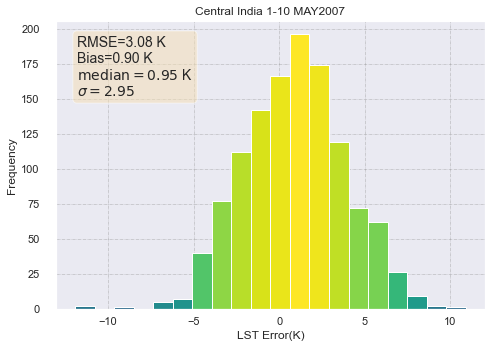

In [30]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('Central India 1-10 MAY2007')
plt.savefig(r'E:\Central India 1-10 MAY2007.jpeg',dpi=400)
plt.show()


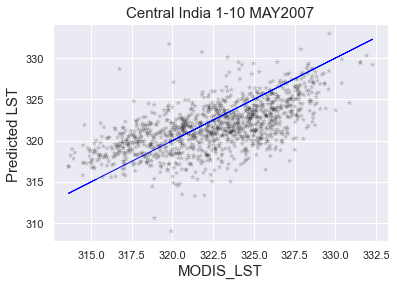

In [31]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Central India 1-10 MAY2007",fontsize=15)
plt.ylabel("Predicted LST ",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.savefig(r'E:\Central India LST 1-10 MAY2007.jpeg',dpi=400)
plt.show()
